# Project: In the dataset HR Wants to predict wheather a employee leave the stay


# Multivariable classfication

when data contain multiple feature 

# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
cd C:\Mehul Session\Session 27_Python Introduction\LMS FT\LMS Python\1_Python_Session_File\5_Machine Learning\3_Logistic_Regression\FT_Sesssion_Binary Regression File\FT_Logistic Session_2

C:\Mehul Session\Session 27_Python Introduction\LMS FT\LMS Python\1_Python_Session_File\5_Machine Learning\3_Logistic_Regression\FT_Sesssion_Binary Regression File\FT_Logistic Session_2


# Import Dataset

In [5]:
df = pd.read_csv("HR_comma_sep.csv")

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Statistical Information

In [24]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# To check null values

In [25]:
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# To check unique values in target column

In [7]:
df['left'].unique()

array([1, 0], dtype=int64)

# Estimated Value of Low income salary has high probabilty of leaving

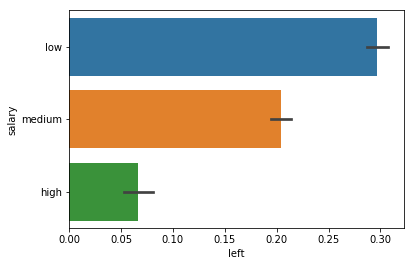

In [8]:
#manual check if salary affect on employee 
sns.barplot(x = 'left', y = 'salary', data = df)


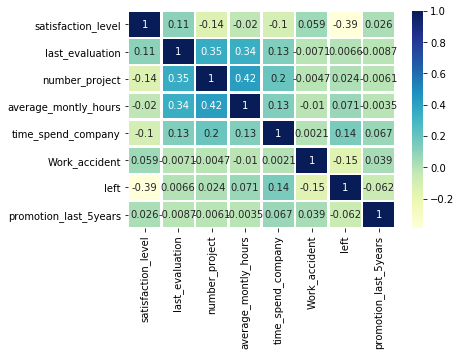

In [28]:
#feature selection
df.corr()
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True, linewidth=1.5, cmap="YlGnBu")


In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
df = pd.get_dummies(df,columns=['salary'], prefix="salary")


In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

In [33]:
x = df[['satisfaction_level', 'number_project',
        'time_spend_company',
       'promotion_last_5years','salary_high', 'salary_low',
       'salary_medium']]
y = df.left

In [34]:
x.head()

,satisfaction_level,number_project,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,2,3,0,0,1,0
1,0.80,5,6,0,0,0,1
2,0.11,7,4,0,0,0,1
3,0.72,5,5,0,0,1,0
4,0.37,2,3,0,0,1,0


In [35]:
x.shape

(14999, 7)

In [36]:
y.shape

(14999,)

# Split Tarin and Test Data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.3)


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evulation

In [39]:
#check traing model score
model.score(X_test,y_test)


0.7561904761904762

In [40]:

#cheack  testing model score
model.score(X_train,y_train)


0.7570571238052901

In [41]:
#there is no overfitting and underfitting

In [42]:
y_pred = model.predict(X_test)


# Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[7404,  571],
       [1989,  536]], dtype=int64)

Text(69.0, 0.5, 'Actual label')

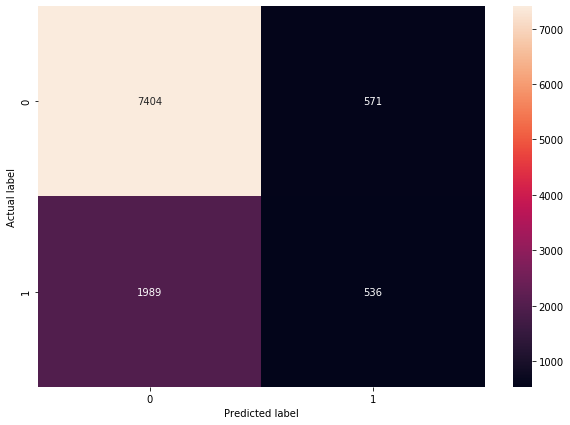

In [45]:
plt.figure(figsize = (10,7))
sns.heatmap(con_mat, annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [47]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))

Accuracy: 0.7561904761904762
Precision: 0.48419150858175247
Recall: 0.21227722772277227
f1_score: 0.2951541850220264


# ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. 

the ROC curve plots the true positive rate (another name for recall) against the false positive rate. 

The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. (recall)

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score

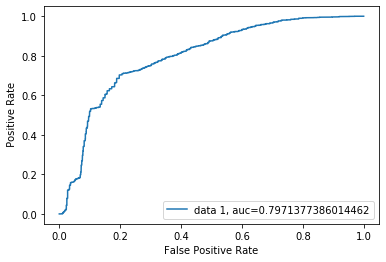

In [49]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()